<a href="https://colab.research.google.com/github/coetzew/Data-Science/blob/main/FINAL_Capstone_Jhb_vs_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL CAPSTONE PROJECT**

### Created for IBM Data Science Professional Certificate

### by Wilma Coetzee

Sandton in Johannesburg, South Africa and Toronto, Canada are both popular tourist destinations.
More and more people are embracing healthier lifestyles, such as vegetarian and vegan eating habits.
The purpose of this study is to determine if the ratio of vegan/vegetarian restaurants to other restaurants are similar in Johannesburg and Toronto. 

If that of Johannesburg is significantly lower than that of Toronto, where should more vegan/vegetarian restaurants be placed?

In [18]:
import numpy as np # library to handle data in a vectorized manner

import math #library needed to calculate distance from lat and long

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [19]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Explore restaurants in Gauteng 

In [ ]:
# Define my FourSquare credentials

CLIENT_ID = 'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret

#Wilma personal details:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'Foursquare SecretO' # your Foursquare Secret
ACCESS_TOKEN = 'your FourSquare Access Toke' # your FourSquare Access Token
#-----------------------------------------------------------------------------------------------

#VERSION = '20180605' # Foursquare API version

VERSION = '20210606' # Foursquare API version - today date
 # LIMIT is a A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


address = 'Sandton, ZA'


geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sandton are {}, {}.'.format(latitude, longitude))

LIMIT=300 #When it works increase to 1000
radius=8000
search_query = 'Restaurant'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# return only relevant information for each nearby venue
venues1 = results['response']['venues']

# tranform venues into a dataframe
gauteng_restaurants = pd.json_normalize(venues1)
gauteng_restaurants.head()
rest_df=gauteng_restaurants




float

In [40]:
# keep only columns that include venue name, and anything that is associated with location
#filtered_columns = ['name', 'categories'] + [col for col in dataframe_j1.columns if col.startswith('location.')] + ['id']
#dataframe_j1_filtered = dataframe_j1.loc[:, filtered_columns]



# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
rest_df['categories'] = rest_df.apply(get_category_type, axis=1)

# clean column names by keeping only last term
rest_df.columns = [column.split('.')[-1] for column in rest_df.columns]

rest_df.head()

,id,name,categories,referralId,hasPerk,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,6050a765243d3a158f633049,Ocean Magic Seafood Restaurant,Asian Restaurant,v-1624686256,False,"Cnr Rivonia Blvd, Shop GA3 Oriental City",9th Ave,-26.056591,28.060204,"[{'label': 'display', 'lat': -26.056591, 'lng'...",1781,2191,ZA,Sandton,IGauteng,iNingizimu Afrika,"[Cnr Rivonia Blvd, Shop GA3 Oriental City (9th...",NaN
1,4ea06d422c5b9f62fb3449dd,The Elm Tree Restaurant,Restaurant,v-1624686256,False,The Syrene Hotel,"28 Wessel Rd, btwn 10th & 11th Ave",-26.052791,28.061692,"[{'label': 'display', 'lat': -26.0527907046599...",2199,2128,ZA,Rivonia,Johannesburg,iNingizimu Afrika,"[The Syrene Hotel (28 Wessel Rd, btwn 10th & 1...",NaN
2,54d258eb498e605ecbc4d6eb,San Restaurant,Breakfast Spot,v-1624686256,False,NaN,NaN,-26.107640,28.051714,"[{'label': 'display', 'lat': -26.10764, 'lng':...",4401,NaN,ZA,NaN,NaN,iNingizimu Afrika,NaN,NaN
3,4bd9dac13904a59366e6439e,Maximillien Restaurant,French Restaurant,v-1624686256,False,"Da Vinci Hotel & Suites, Maude St.",NaN,-26.107529,28.053211,"[{'label': 'display', 'lat': -26.1075290072536...",4404,NaN,ZA,Sandton,IGauteng,iNingizimu Afrika,"[Da Vinci Hotel & Suites, Maude St., Sandton]",NaN
4,60b3b1efbc414b5b7f38bea7,Yuehua Restaurant,Chinese Restaurant,v-1624686256,False,Rivonia Central,NaN,-26.056688,28.060489,"[{'label': 'display', 'lat': -26.056688, 'lng'...",1793,2191,ZA,Sandton,IGauteng,iNingizimu Afrika,"[Rivonia Central, Sandton, 2191]",NaN


In [41]:
rest_df.shape

(50, 18)

In [42]:
filtered_columns = ['name', 'country', 'categories','lat', 'lng']
rest_df_filtered = rest_df.loc[:, filtered_columns]

rest_df_filtered.head()

,name,country,categories,lat,lng
0,Ocean Magic Seafood Restaurant,iNingizimu Afrika,Asian Restaurant,-26.056591,28.060204
1,The Elm Tree Restaurant,iNingizimu Afrika,Restaurant,-26.052791,28.061692
2,San Restaurant,iNingizimu Afrika,Breakfast Spot,-26.107640,28.051714
3,Maximillien Restaurant,iNingizimu Afrika,French Restaurant,-26.107529,28.053211
4,Yuehua Restaurant,iNingizimu Afrika,Chinese Restaurant,-26.056688,28.060489


In [43]:
# Write dataframe to csv file and save on my computer

from google.colab import files
rest_df_filtered.to_csv('Jhb_restaurants.csv') 
files.download('Jhb_restaurants.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Find vegetarian and vegan eateries in Jhb

In [45]:
address = 'Sandton, ZA'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Johannesburg are {}, {}.'.format(latitude, longitude))

LIMIT=100 #When it works increase to 1000
radius=8000
search_query = 'Vegetarian / Vegan'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results2 = requests.get(url).json()

# return only relevant information for each nearby venue
venues2 = results2['response']['venues']

# tranform venues into a dataframe
veg_df = pd.json_normalize(venues2)


In [46]:
# Filter columns
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
veg_df['categories'] = veg_df.apply(get_category_type, axis=1)

# clean column names by keeping only last term
veg_df.columns = [column.split('.')[-1] for column in veg_df.columns]

veg_df.head()

,id,name,categories,referralId,hasPerk,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress
0,5dc5a81171af1100084c6cd3,Vegan e Meet Italy,Italian Restaurant,v-1624686300,False,4 Rutland Avenue,Jan Smuts Avenue,-26.118937,28.025915,"[{'label': 'display', 'lat': -26.118937, 'lng'...",6059,2196,ZA,Randburg,IGauteng,iNingizimu Afrika,"[4 Rutland Avenue (Jan Smuts Avenue), Randburg..."
1,5b4081ad25ecca002c5d8356,The Fussy Vegan,Vegetarian / Vegan Restaurant,v-1624686300,False,NaN,NaN,-26.111935,28.018875,"[{'label': 'display', 'lat': -26.111935, 'lng'...",5668,2194,ZA,Randburg,IGauteng,iNingizimu Afrika,"[Randburg, 2194]"
2,52e390e8498eaa6d704db880,Simply Divine vegetarian,Vegetarian / Vegan Restaurant,v-1624686300,False,Susman,Conrad,-26.115349,28.011224,"[{'label': 'display', 'lat': -26.1153489507787...",6403,NaN,ZA,NaN,NaN,iNingizimu Afrika,[Susman (Conrad)]


In [47]:
veg_df.shape

(3, 17)

In [48]:
filtered_columns = ['name', 'country', 'categories','lat', 'lng']
veg_df_filtered = veg_df.loc[:, filtered_columns]

veg_df_filtered.head()

,name,country,categories,lat,lng
0,Vegan e Meet Italy,iNingizimu Afrika,Italian Restaurant,-26.118937,28.025915
1,The Fussy Vegan,iNingizimu Afrika,Vegetarian / Vegan Restaurant,-26.111935,28.018875
2,Simply Divine vegetarian,iNingizimu Afrika,Vegetarian / Vegan Restaurant,-26.115349,28.011224


## Calculate the distances between vegan restaurants in Sandton

In [49]:
# calculate distance matrix between vegan restaurants

import numpy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 

n=len(veg_df_filtered)

# Create an empty 2D numpy array with n rows and n columns
coordj = np.empty((n, 2), float)

for i in range(n):
  coordj[i][0]=veg_df_filtered['lat'][i]
  coordj[i][1]=veg_df_filtered['lng'][i]


#coordj

In [50]:
coordinates_array = numpy.array(coordj)
distj_array = pdist(coordinates_array)

#The array gives the distances between 
distj_matrix = squareform(distj_array)

#distj_matrix

In [51]:
# Calculate average distance, min distance and max distance between restaurants
minj=round(np.min(distj_array)*100,3)

maxj=round(np.max(distj_array)*100,1)

avgj=round(np.average(distj_array)*100,1)

print("The minimum distance between veg*an restaurants in Sandton is", minj, "km")

print("The maximum distance between veg*an restaurants in Sandton is", maxj, "km")

print("The average distance between veg*an restaurants in Sandton is", avgj, "km")

The minimum distance between veg*an restaurants in Sandton is 0.838 km
The maximum distance between veg*an restaurants in Sandton is 1.5 km
The average distance between veg*an restaurants in Sandton is 1.1 km


In [52]:
# Write dataframe to csv file and save on my computer

from google.colab import files
veg_df_filtered.to_csv('Jhb_vegan.csv') 
files.download('Jhb_vegan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
# Combine restaurants and vegetarian/vegan eateries in Jhb

Jhb_df=rest_df_filtered.append(veg_df_filtered)
Jhb_df2=Jhb_df.dropna()
Jhb_df2

Jhb_df3=Jhb_df2[Jhb_df2['categories'].str.contains("Restaurant")]
Jhb_df3=Jhb_df3.reset_index()
Jhb_df3.head()



,index,name,country,categories,lat,lng
0,0,Ocean Magic Seafood Restaurant,iNingizimu Afrika,Asian Restaurant,-26.056591,28.060204
1,1,The Elm Tree Restaurant,iNingizimu Afrika,Restaurant,-26.052791,28.061692
2,3,Maximillien Restaurant,iNingizimu Afrika,French Restaurant,-26.107529,28.053211
3,4,Yuehua Restaurant,iNingizimu Afrika,Chinese Restaurant,-26.056688,28.060489
4,5,Erawan Thai Restaurant and Bar,iNingizimu Afrika,Thai Restaurant,-26.058651,28.046673


In [87]:
jhb_counta=Jhb_df3.groupby('categories').count()[['name']]
jhb_counta.columns = ['Freq']
jhb_counta

,Freq
categories,
African Restaurant,3
Asian Restaurant,3
Chinese Restaurant,3
Eastern European Restaurant,1
French Restaurant,1
Indian Restaurant,5
Italian Restaurant,4
Japanese Restaurant,3
Korean Restaurant,3


In [54]:
Jhb_4=Jhb_df3


Jhb_4["color"] = ""
Jhb_4["fill_color"] = ""

Jhb_4.head()

,index,name,country,categories,lat,lng,color,fill_color
0,0,Ocean Magic Seafood Restaurant,iNingizimu Afrika,Asian Restaurant,-26.056591,28.060204,,
1,1,The Elm Tree Restaurant,iNingizimu Afrika,Restaurant,-26.052791,28.061692,,
2,3,Maximillien Restaurant,iNingizimu Afrika,French Restaurant,-26.107529,28.053211,,
3,4,Yuehua Restaurant,iNingizimu Afrika,Chinese Restaurant,-26.056688,28.060489,,
4,5,Erawan Thai Restaurant and Bar,iNingizimu Afrika,Thai Restaurant,-26.058651,28.046673,,


In [55]:

Jhb_df4=Jhb_4
for ind in Jhb_4.index:
  if ((Jhb_4['categories'][ind]=="Chinese Restaurant") or (Jhb_4['categories'][ind]=="Asian Restaurant") or (Jhb_4['categories'][ind]=="Indian Restaurant") or 
       (Jhb_4['categories'][ind]=="Korean Restaurant") or (Jhb_4['categories'][ind]=="Thai Restaurant") or (Jhb_4['categories'][ind]=="Vietnamese Restaurant")or (Jhb_4['categories'][ind]=="Sushi Restaurant")):
    Jhb_df4['categories'][ind]="Asian / Indian Restaurant"
    Jhb_df4['color'][ind] = "red"
    Jhb_df4["fill_color"][ind] = "orange"
  elif ((Jhb_4['categories'][ind]=="Italian Restaurant") or (Jhb_4['categories'][ind]=="Mediterranean Restaurant") or (Jhb_4['categories'][ind]=="Modern European Restaurant") or (Jhb_4['categories'][ind]=="French Restaurant")):
    Jhb_df4['categories'][ind]="European Restaurant"
    Jhb_df4['color'][ind] = "blue"
    Jhb_df4["fill_color"][ind] = "white"
  elif ((Jhb_4['categories'][ind]=="American Restaurant") or (Jhb_4['categories'][ind]=="New American Restaurant") or (Jhb_4['categories'][ind]=="Steakhouse") or (Jhb_4['categories'][ind]=="Fast Food Restaurant") ):
    Jhb_df4['categories'][ind]="American / Steakhouse / Fast food Restaurant"
    Jhb_df4['color'][ind] = "blue"
    Jhb_df4["fill_color"][ind] = "red"
  elif (Jhb_4['categories'][ind]=="African Restaurant"):
    Jhb_df4['color'][ind] = "black"
    Jhb_df4["fill_color"][ind] = "red"
    Jhb_df4['categories'][ind]="African Restaurant"
  elif (Jhb_4['categories'][ind]=="Vegetarian / Vegan Restaurant"):
    Jhb_df4['categories'][ind]="Vegetarian / Vegan Restaurant"
    Jhb_df4['color'][ind] = "green"
    Jhb_df4["fill_color"][ind] = "yellow"
  else:
    Jhb_df4['categories'][ind]="Other Restaurant"
    Jhb_df4['color'][ind] = "purple"
    Jhb_df4["fill_color"][ind] = "purple"

Jhb_df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A valu

,index,name,country,categories,lat,lng,color,fill_color
0,0,Ocean Magic Seafood Restaurant,iNingizimu Afrika,Asian / Indian Restaurant,-26.056591,28.060204,red,orange
1,1,The Elm Tree Restaurant,iNingizimu Afrika,Other Restaurant,-26.052791,28.061692,purple,purple
2,3,Maximillien Restaurant,iNingizimu Afrika,European Restaurant,-26.107529,28.053211,blue,white
3,4,Yuehua Restaurant,iNingizimu Afrika,Asian / Indian Restaurant,-26.056688,28.060489,red,orange
4,5,Erawan Thai Restaurant and Bar,iNingizimu Afrika,Asian / Indian Restaurant,-26.058651,28.046673,red,orange


## Calculate distances between all restaurants in Sandton

In [56]:
# calculate distance matrix between restaurants

import numpy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 

n=len(Jhb_df4)

# Create an empty 2D numpy array with n rows and n columns
coordja = np.empty((n, 2), float)

for i in range(n):
  coordja[i][0]=Jhb_df4['lat'][i]
  coordja[i][1]=Jhb_df4['lng'][i]


#coordja

In [57]:
coordinates_arrayja = numpy.array(coordja)
dist_arrayja = pdist(coordinates_arrayja)

#The array gives the distances between 
dist_matrixja = squareform(dist_arrayja)

# Calculate average distance, min distance and max distance between restaurants
minja=round(np.min(dist_arrayja)*100,3)

maxja=round(np.max(dist_arrayja)*100,1)

avgja=round(np.average(dist_arrayja)*100,1)

#print("Array", dist_arrayja)

print("The minimum distance between all restaurants in Sandton is", minja, "km")

print("The maximum distance between all restaurants in Sandton is", maxja, "km")

print("The average distance between all restaurants in Sandton is", avgja, "km")

The minimum distance between all restaurants in Sandton is 0.008 km
The maximum distance between all restaurants in Sandton is 13.3 km
The average distance between all restaurants in Sandton is 4.8 km


In [58]:
jhb_count=Jhb_df4.groupby('categories').count()[['name']]
jhb_count.columns = ['Freq']
jhb_count



,Freq
categories,
African Restaurant,3
Asian / Indian Restaurant,16
European Restaurant,7
Other Restaurant,10
Vegetarian / Vegan Restaurant,2


In [59]:
sample_success_j=jhb_count['Freq']['Vegetarian / Vegan Restaurant']
sample_size_j=(len(Jhb_df4))

prop_vegan_j=jhb_count['Freq']['Vegetarian / Vegan Restaurant']/(len(Jhb_df4))
print( "The proportion of veg*an restaurants in Sandton is", round(prop_vegan_j, 3))

The proportion of veg*an restaurants in Sandton is 0.053


Text(0.5, 1.0, 'Cuisine in Sandton, South Africa')

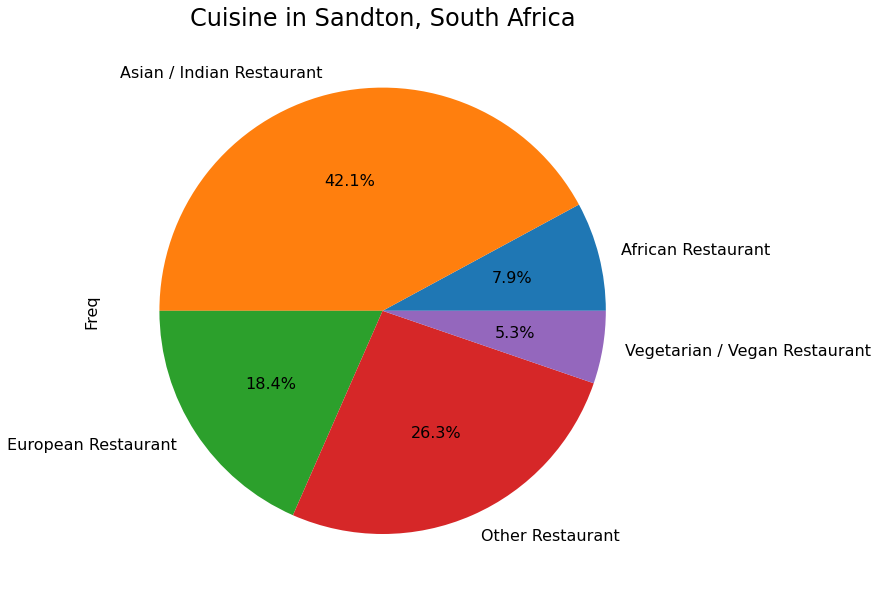

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16.0

jhb_count.plot(kind='pie', y='Freq', legend=False, autopct='%2.1f%%', figsize=(10, 15))

plt.title("Cuisine in Sandton, South Africa", fontsize=24)

Text(0, 0.5, 'Number of restaurants')

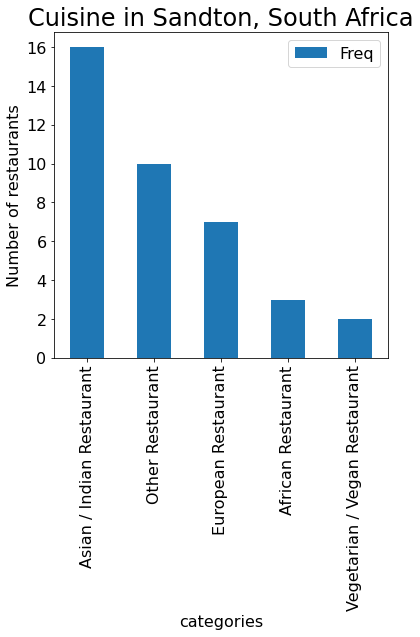

In [61]:
jhb_count.sort_values(by='Freq',ascending=False).plot.bar(figsize=(6, 6))

mpl.rcParams['font.size'] = 16.0

plt.title("Cuisine in Sandton, South Africa", fontsize=24)
plt.ylabel("Number of restaurants")

## Display map of Sandton with different restaurants

In [62]:
address = 'Sandton, ZA'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

Jvenues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Cafe

# add a red circle marker to represent the Cafe
folium.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='pink',
    popup='Sandton',
    fill = True,
    fill_color = 'pink',
    fill_opacity = 0.6
).add_to(Jvenues_map)

# add the Italian restaurants as blue circle markers
for ind, lat, lng, label in zip(Jhb_df4.index,Jhb_df4.lat, Jhb_df4.lng, Jhb_df4.categories):
    
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        fill = True,
        fill_color=Jhb_df4['fill_color'][ind],
        color=Jhb_df4['color'][ind],
        fill_opacity=0.6
    ).add_to(Jvenues_map)

# display map
Jvenues_map

## Explore restaurants in Toronto

In [63]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Johannesburg are {}, {}.'.format(latitude, longitude))

LIMIT=500 #When it works increase to 1000
radius=8000
search_query = 'Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
resultst = requests.get(url).json()

# return only relevant information for each nearby venue
venues1t = resultst['response']['venues']

# tranform venues into a dataframe
toronto_restaurants = pd.json_normalize(venues1t)
toronto_restaurants.head()
rest_dft=toronto_restaurants
rest_dft.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1624686459,False,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",224,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN
1,4ada5d5bf964a520e92121e3,The Hot House Restaurant & Bar,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1624686459,False,35 Church St,43.648824,-79.373702,"[{'label': 'display', 'lat': 43.64882370529773...",973,M5E 1T3,CA,Toronto,ON,Canada,"[35 Church St (at Front St E), Toronto ON M5E ...",at Front St E,NaN,NaN
2,4ad4c060f964a5207ff720e3,Rol San Restaurant 龍笙棧,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1624686459,False,323 Spadina Ave.,43.654318,-79.398650,"[{'label': 'display', 'lat': 43.65431754076345...",1188,M5T 2E9,CA,Toronto,ON,Canada,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...",at D'Arcy St.,Kensington Market,NaN
3,4b266f05f964a520657b24e3,Goldstone Noodle Restaurant 金石,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",v-1624686459,False,266 Spadina Ave,43.652278,-79.398039,"[{'label': 'display', 'lat': 43.6522783893466,...",1143,M5T 2E4,CA,Toronto,ON,Canada,"[266 Spadina Ave (at Willison Sq), Toronto ON ...",at Willison Sq,NaN,NaN
4,5750b013498e755287c6de97,Some Time BBQ Grill Restaurant 碳烤屋,"[{'id': '52af3b773cf9994f4e043c03', 'name': 'S...",v-1624686459,False,988 Baldwin Street,43.655874,-79.393826,"[{'label': 'display', 'lat': 43.655874, 'lng':...",839,NaN,CA,Toronto,ON,Canada,"[988 Baldwin Street, Toronto ON, Canada]",NaN,NaN,NaN


In [64]:
rest_dft.shape

(50, 19)

In [65]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
rest_dft['categories'] = rest_dft.apply(get_category_type, axis=1)

# clean column names by keeping only last term
rest_dft.columns = [column.split('.')[-1] for column in rest_dft.columns]

rest_dft.head()

,id,name,categories,referralId,hasPerk,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,American Restaurant,v-1624686459,False,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",224,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN
1,4ada5d5bf964a520e92121e3,The Hot House Restaurant & Bar,American Restaurant,v-1624686459,False,35 Church St,43.648824,-79.373702,"[{'label': 'display', 'lat': 43.64882370529773...",973,M5E 1T3,CA,Toronto,ON,Canada,"[35 Church St (at Front St E), Toronto ON M5E ...",at Front St E,NaN,NaN
2,4ad4c060f964a5207ff720e3,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,v-1624686459,False,323 Spadina Ave.,43.654318,-79.398650,"[{'label': 'display', 'lat': 43.65431754076345...",1188,M5T 2E9,CA,Toronto,ON,Canada,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...",at D'Arcy St.,Kensington Market,NaN
3,4b266f05f964a520657b24e3,Goldstone Noodle Restaurant 金石,Noodle House,v-1624686459,False,266 Spadina Ave,43.652278,-79.398039,"[{'label': 'display', 'lat': 43.6522783893466,...",1143,M5T 2E4,CA,Toronto,ON,Canada,"[266 Spadina Ave (at Willison Sq), Toronto ON ...",at Willison Sq,NaN,NaN
4,5750b013498e755287c6de97,Some Time BBQ Grill Restaurant 碳烤屋,Szechuan Restaurant,v-1624686459,False,988 Baldwin Street,43.655874,-79.393826,"[{'label': 'display', 'lat': 43.655874, 'lng':...",839,NaN,CA,Toronto,ON,Canada,"[988 Baldwin Street, Toronto ON, Canada]",NaN,NaN,NaN


In [66]:
filtered_columns = ['name', 'country', 'categories','lat', 'lng']
rest_dft_filtered = rest_dft.loc[:, filtered_columns]

rest_dft_filtered.head()

,name,country,categories,lat,lng
0,Hemispheres Restaurant & Bistro,Canada,American Restaurant,43.654884,-79.385931
1,The Hot House Restaurant & Bar,Canada,American Restaurant,43.648824,-79.373702
2,Rol San Restaurant 龍笙棧,Canada,Dim Sum Restaurant,43.654318,-79.398650
3,Goldstone Noodle Restaurant 金石,Canada,Noodle House,43.652278,-79.398039
4,Some Time BBQ Grill Restaurant 碳烤屋,Canada,Szechuan Restaurant,43.655874,-79.393826


## Find vegetarian and vegan eateries in Toronto

In [67]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Johannesburg are {}, {}.'.format(latitude, longitude))

LIMIT=300 #When it works increase to 1000
radius=8000
search_query = 'Vegetarian / Vegan'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results4 = requests.get(url).json()

# return only relevant information for each nearby venue
venues4 = results4['response']['venues']

# tranform venues into a dataframe
veg_dft = pd.json_normalize(venues4)

In [68]:
# Filter columns
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
veg_dft['categories'] = veg_dft.apply(get_category_type, axis=1)

# clean column names by keeping only last term
veg_dft.columns = [column.split('.')[-1] for column in veg_dft.columns]

veg_dft.head()

,id,name,categories,referralId,hasPerk,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood
0,4aeb711ef964a52017c221e3,Vegetarian Haven,Vegetarian / Vegan Restaurant,v-1624686490,False,17 Baldwin St,43.656016,-79.392758,"[{'label': 'display', 'lat': 43.65601602835709...",764,M5T 1L1,CA,Toronto,ON,Canada,"[17 Baldwin St, Toronto ON M5T 1L1, Canada]",NaN,NaN
1,5cf43e873ba767002c95ce10,Vegan Bear,Vegetarian / Vegan Restaurant,v-1624686490,False,NaN,43.657124,-79.380948,"[{'label': 'display', 'lat': 43.657124, 'lng':...",471,M5B 1R7,CA,Toronto,ON,Canada,"[Toronto ON M5B 1R7, Canada]",NaN,NaN
2,5cf43e6586f4cc0036861396,Vegan Bear,Vegetarian / Vegan Restaurant,v-1624686490,False,NaN,43.657124,-79.380948,"[{'label': 'display', 'lat': 43.657124, 'lng':...",471,M5B 1R7,CA,Toronto,ON,Canada,"[Toronto ON M5B 1R7, Canada]",NaN,NaN
3,5dbb4a61d042bf000828671b,Losco Vegan,Vegetarian / Vegan Restaurant,v-1624686490,False,NaN,43.650565,-79.383419,"[{'label': 'display', 'lat': 43.650565, 'lng':...",327,M5H 2G4,CA,Toronto,ON,Canada,"[Toronto ON M5H 2G4, Canada]",NaN,NaN
4,4feb68ece4b07864fce4d4e7,Vegetarian Cafe in the Big Carrot,Vegetarian / Vegan Restaurant,v-1624686490,False,348 Danforth Ave,43.677874,-79.352939,"[{'label': 'display', 'lat': 43.677874, 'lng':...",3688,NaN,CA,Toronto,ON,Canada,"[348 Danforth Ave, Toronto ON, Canada]",NaN,NaN


In [69]:
veg_dft.shape

(32, 18)

In [70]:
filtered_columns = ['name', 'country', 'categories','lat', 'lng']
veg_dft_filtered = veg_dft.loc[:, filtered_columns]
veg_dft_filtered.drop_duplicates(subset ="name",
                     keep = "first", inplace = True)
veg_dft_filtered = veg_dft_filtered.reset_index(drop=True)

veg_dft_filtered.head()


,name,country,categories,lat,lng
0,Vegetarian Haven,Canada,Vegetarian / Vegan Restaurant,43.656016,-79.392758
1,Vegan Bear,Canada,Vegetarian / Vegan Restaurant,43.657124,-79.380948
2,Losco Vegan,Canada,Vegetarian / Vegan Restaurant,43.650565,-79.383419
3,Vegetarian Cafe in the Big Carrot,Canada,Vegetarian / Vegan Restaurant,43.677874,-79.352939
4,The Vegan Extremist,Canada,Vegetarian / Vegan Restaurant,43.656422,-79.402617


In [71]:
veg_dft_filtered.shape

(31, 5)

## Determine distances between vegan restaurants in Toronto

In [72]:
# calculate distance matrix between restaurants

n=len(veg_dft_filtered)

# Create an empty 2D numpy array with n rows and n columns
coordt = np.empty((n, 2), float)

for i in range(n):
  coordt[i][0]=veg_dft_filtered['lat'][i]
  coordt[i][1]=veg_dft_filtered['lng'][i]

#coordt

In [73]:
coordinates_arrayt =np.array(coordt)
dist_arrayt = pdist(coordinates_arrayt)

#The array gives the distances between 
dist_matrixt = squareform(dist_arrayt)

# Calculate average distance, min distance and max distance between restaurants
#mint=round(np.min(dist_arrayt)*100,3)  #if this gives zero, use next smallest
sortedt=np.sort(dist_arrayt)
mint=round(sortedt[2],3)

maxt=round(np.max(dist_arrayt)*100,1)

avgt=round(np.average(dist_arrayt)*100,1)

print("Array", dist_arrayt)

print("The minimum distance between veg*an restaurants in Toronto is", mint, "km")

print("The maximum distance between veg*an restaurants in Toronto is", maxt, "km")

print("The average distance between veg*an restaurants in Toronto is", avgt, "km")

Array [1.18616343e-02 1.08132518e-02 4.54236249e-02 9.86758057e-03
 7.53632727e-02 2.07011229e-02 1.15030337e-04 1.05068786e-02
 1.79454462e-02 1.91514655e-02 1.25833074e-02 2.69248882e-02
 2.71434144e-02 3.06419080e-02 1.04154773e-02 5.30010109e-02
 4.14259203e-02 4.24231728e-02 4.08655762e-02 1.13269216e-02
 5.66244169e-02 1.01286758e-01 4.10603904e-02 4.13053128e-02
 4.10628221e-02 4.00216687e-02 4.95935487e-02 2.17599402e-02
 6.29620841e-02 7.80465170e-02 7.00901719e-03 3.48578052e-02
 2.16803682e-02 8.71696853e-02 2.85027913e-02 1.19634475e-02
 2.21422951e-02 2.82339042e-02 2.95647501e-02 2.43542810e-02
 3.82212391e-02 3.66613363e-02 4.20833191e-02 2.20300247e-02
 5.45473448e-02 5.29908782e-02 5.42694903e-02 5.24143103e-02
 2.29649962e-02 4.56050734e-02 8.98143499e-02 5.25964069e-02
 2.96246445e-02 5.26009780e-02 5.16887137e-02 6.13577541e-02
 3.22488318e-02 7.15623164e-02 8.96804086e-02 4.09244656e-02
 2.00715633e-02 8.49266429e-02 2.23393313e-02 1.08650711e-02
 1.91650869e-02 2.

In [88]:
# Combine restaurants and vegetarian/vegan eateries in Toronto

Tor_df=rest_dft_filtered.append(veg_dft_filtered)
Tor_df2=Tor_df.dropna()
Tor_df2

Tor_df3=Tor_df2[Tor_df2['categories'].str.contains("Restaurant")]
Tor_df3=Tor_df3.reset_index()
Tor_df3.drop_duplicates(subset ="name",
                     keep = "first", inplace = True)
Tor_df3 = Tor_df3.reset_index(drop=True)
Tor_df3.head()

,index,name,country,categories,lat,lng
0,0,Hemispheres Restaurant & Bistro,Canada,American Restaurant,43.654884,-79.385931
1,1,The Hot House Restaurant & Bar,Canada,American Restaurant,43.648824,-79.373702
2,2,Rol San Restaurant 龍笙棧,Canada,Dim Sum Restaurant,43.654318,-79.398650
3,4,Some Time BBQ Grill Restaurant 碳烤屋,Canada,Szechuan Restaurant,43.655874,-79.393826
4,5,North-East Chinese Restaurant 華北美食,Canada,Chinese Restaurant,43.653185,-79.396677


In [89]:
Tor_df3.shape

(62, 6)

In [91]:
tor_counta=Tor_df3.groupby('categories').count()[['name']]
tor_counta.columns = ['Freq']
tor_counta

,Freq
categories,
American Restaurant,4
Asian Restaurant,1
Caribbean Restaurant,2
Chinese Restaurant,8
Dim Sum Restaurant,3
Indian Restaurant,2
Italian Restaurant,3
Korean Restaurant,3
New American Restaurant,4


In [76]:
Tor_4 = Tor_df3
Tor_4["color"] = ""
Tor_4["fill_color"] = ""
Tor_df4=Tor_4


for ind in Tor_4.index:
  if ((Tor_4['categories'][ind]=="Chinese Restaurant") or (Tor_4['categories'][ind]=="Asian Restaurant") or (Tor_4['categories'][ind]=="Indian Restaurant") or 
       (Tor_4['categories'][ind]=="Korean Restaurant") or (Tor_4['categories'][ind]=="Thai Restaurant") or (Tor_4['categories'][ind]=="Vietnamese Restaurant")or (Tor_4['categories'][ind]=="Sushi Restaurant")):
    Tor_df4['categories'][ind]="Asian / Indian Restaurant"
    Tor_df4['color'][ind] = "red"
    Tor_df4["fill_color"][ind] = "orange"

  elif ((Tor_4['categories'][ind]=="Italian Restaurant") or (Tor_4['categories'][ind]=="Mediterranean Restaurant") or (Tor_4['categories'][ind]=="Modern European Restaurant") or (Tor_4['categories'][ind]=="French Restaurant")):
    Tor_df4['categories'][ind]="European Restaurant"
    Tor_df4['color'][ind] = "blue"
    Tor_df4["fill_color"][ind] = "white"

  elif ((Tor_4['categories'][ind]=="American Restaurant") or (Tor_4['categories'][ind]=="New American Restaurant") or (Tor_4['categories'][ind]=="Steakhouse") or (Tor_4['categories'][ind]=="Fast Food Restaurant") ):
    Tor_df4['categories'][ind]="American / Steakhouse / Fast food Restaurant"
    Tor_df4['color'][ind] = "blue"
    Tor_df4["fill_color"][ind] = "red"

  elif (Tor_4['categories'][ind]=="African Restaurant"):
    Tor_df4['categories'][ind]="African Restaurant"
    Tor_df4['color'][ind] = "black"
    Tor_df4["fill_color"][ind] = "red"

  elif (Tor_4['categories'][ind]=="Vegetarian / Vegan Restaurant"):
    Tor_df4['categories'][ind]="Vegetarian / Vegan Restaurant"
    Tor_df4['color'][ind] = "green"
    Tor_df4["fill_color"][ind] = "yellow"

  else:
    Tor_df4['categories'][ind]="Other Restaurant"
    Tor_df4['color'][ind] = "purple"
    Tor_df4["fill_color"][ind] = "purple"

Tor_df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to b

,index,name,country,categories,lat,lng,color,fill_color
0,0,Hemispheres Restaurant & Bistro,Canada,American / Steakhouse / Fast food Restaurant,43.654884,-79.385931,blue,red
1,1,The Hot House Restaurant & Bar,Canada,American / Steakhouse / Fast food Restaurant,43.648824,-79.373702,blue,red
2,2,Rol San Restaurant 龍笙棧,Canada,Other Restaurant,43.654318,-79.398650,purple,purple
3,4,Some Time BBQ Grill Restaurant 碳烤屋,Canada,Other Restaurant,43.655874,-79.393826,purple,purple
4,5,North-East Chinese Restaurant 華北美食,Canada,Asian / Indian Restaurant,43.653185,-79.396677,red,orange


## Determine disctances between all Toronto restaurants

In [77]:
# calculate distance matrix between restaurants

n=len(Tor_df4)

# Create an empty 2D numpy array with n rows and n columns
coordta = np.empty((n, 2), float)

for i in range(n):
  coordta[i][0]=Tor_df4['lat'][i]
  coordta[i][1]=Tor_df4['lng'][i]


#coordta

In [78]:
coordinates_arrayta = numpy.array(coordta)
dist_arrayta = pdist(coordinates_arrayta)

#The array gives the distances between 
dist_matrixta = squareform(dist_arrayta)

# Calculate averae digstance, min distance and max distance between restaurants
#  minta=round(np.min(dist_arrayta)*100,3) #if this gives zero, use next smallest
sorted=np.sort(dist_arrayta)
minta=round(sorted[2],3)
maxta=round(np.max(dist_arrayta)*100,1)

avgta=round(np.average(dist_arrayta)*100,1)

#print("Array", dist_arrayta)

print("The minimum distance between all restaurants in Toronto is", minta, "km")

print("The maximum distance between all restaurants in Toronto is", maxta, "km")

print("The average distance between all restaurants in Toronto is", avgta, "km")

The minimum distance between all restaurants in Toronto is 0.0 km
The maximum distance between all restaurants in Toronto is 17.5 km
The average distance between all restaurants in Toronto is 3.0 km


In [79]:
tor_count=Tor_df4.groupby('categories').count()[['name']]
tor_count.columns = ['Freq']
tor_count

,Freq
categories,
American / Steakhouse / Fast food Restaurant,8
Asian / Indian Restaurant,18
European Restaurant,3
Other Restaurant,13
Vegetarian / Vegan Restaurant,20


In [80]:
sample_success_t=tor_count['Freq']['Vegetarian / Vegan Restaurant']
sample_size_t=(len(Tor_df4))
prop_vegan_t=tor_count['Freq']['Vegetarian / Vegan Restaurant']/(len(Tor_df4))
print( "The proportion of veg*an restaurants in Toronto is", round(prop_vegan_t, 2))


The proportion of veg*an restaurants in Toronto is 0.32


Text(0.5, 1.0, 'Cuisine in Toronto, Canada')

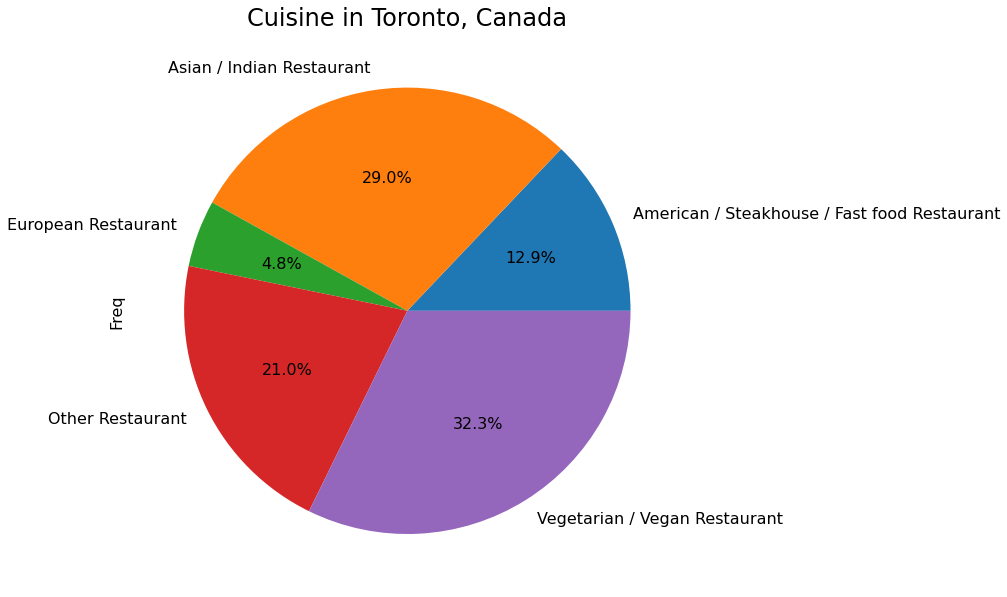

In [81]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16.0

tor_count.plot(kind='pie', y='Freq', legend=False, autopct='%2.1f%%', figsize=(10, 15), )

plt.title("Cuisine in Toronto, Canada", fontsize=24)

Text(0, 0.5, 'Number of restaurants')

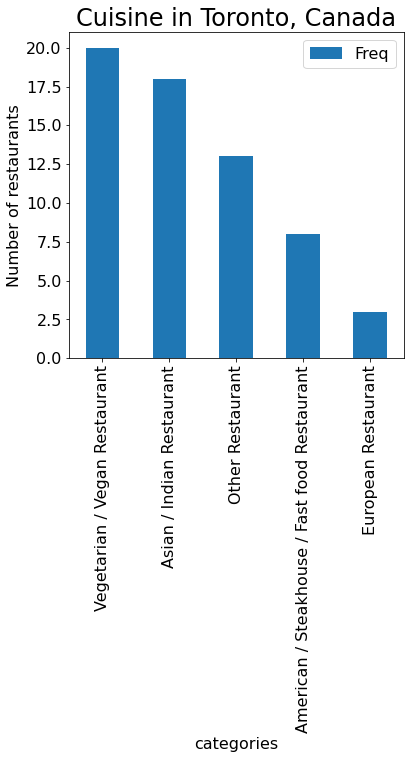

In [82]:
tor_count.sort_values(by='Freq',ascending=False).plot.bar(figsize=(6, 6))

mpl.rcParams['font.size'] = 16.0

plt.title("Cuisine in Toronto, Canada", fontsize=24)
plt.ylabel("Number of restaurants")

In [83]:
Tvenues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Cafe

# add a red circle marker to represent the city
folium.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='pink',
    popup='Toronto',
    fill = True,
    fill_color = 'pink',
    fill_opacity = 0.6
).add_to(Tvenues_map)

# add the Italian restaurants as blue circle markers
for ind, lat, lng, label in zip(Tor_df4.index, Tor_df4.lat, Tor_df4.lng, Tor_df4.categories):
    
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        fill = True,
        fill_color=Tor_df4['fill_color'][ind],
        color=Tor_df4['color'][ind],
        fill_opacity=0.6
    ).add_to(Tvenues_map)

# display map
Tvenues_map

# Inferential statistics:

## Determine if the proportion veg*an restaurants differ significantly if we compare Sandton and Toronto, based on our sample

In [84]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
# can we assume anything from our sample
significance = 0.025
# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a, sample_size_a = (sample_success_j, sample_size_j)
sample_success_b, sample_size_b = (sample_success_t, sample_size_t)
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

z_stat: -3.163, p_value: 0.002
Reject the null hypothesis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
